<a href="https://colab.research.google.com/github/aandreana/statistics/blob/master/Foundations_of_Probability_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundations of Probability in Python

In [ ]:
########################### STANDARD IMPORTS ##################################
# Standard Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

from pathlib import Path
from IPython.display import display, HTML

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from datetime import datetime as dt

import scipy.stats as st

import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Chapter 1
## Flipping Coins

Simulate 1 flip, with a 35% chance of heads.

In [ ]:
# Simulate one coin flip with 35% chance of getting heads
coin_flip = st.bernoulli.rvs(p=0.35, size=1)
print(coin_flip)

[1]


Simulate 20 trials of 10 coin flips with a 35% chance of getting heads.

In [ ]:
# Simulate 20 trials of 10 coin flips 
draws = st.binom.rvs(n=10, p=0.35, size=20)
print(draws)

[6 2 5 4 4 5 3 4 3 2 3 2 4 4 5 5 4 5 3 3]


## Probability Mass and Distribution Functions

### Predicting the probability of defects

Any situation with exactly two possible outcomes can be modeled with binomial random variables. For example, you could model if someone likes or dislikes a product, or if they voted or not.

Let's model whether or not a component from a supplier comes with a defect. From the thousands of components that we got from a supplier, we are going to take a sample of 50, selected randomly. The agreed and accepted defect rate is 2%.

In [ ]:
# What is the probability of getting more than 20 heads from a fair coin after 30 coin flips?
st.binom.sf(k=20, n=30, p=0.5)

0.02138697262853384

### Predicting employment status

Consider a survey about employment that contains the question "Are you employed?" It is known that 65% of respondents will answer "yes." Eight survey responses have been collected.

In [ ]:
# Calculate the probability of getting exactly 5 yes responses
prob_five_yes = st.binom.pmf(k=5, n=8, p=0.65)
print(prob_five_yes)

0.27858577906250004


In [ ]:
# Calculate the probability of getting 3 or less no responses
prob_three_or_less_no = 1-st.binom.cdf(k=3, n=8, p=0.65)
print(prob_three_or_less_no)

0.8939090951171875


In [ ]:
# Calculate the probability of getting more than 3 yes responses
prob_more_than_three_yes = st.binom.sf(k=3, n=8, p=0.65)
print(prob_more_than_three_yes)

0.8939090951171875


### Predicting burglary conviction rate

There are many situations that can be modeled with only two outcomes: success or failure. This exercise presents a situation that can be modeled with a binomial distribution and gives you the opportunity to calculate probabilities using binom.pmf(), binom.cdf(), and binom.sf().

The binom object from scipy.stats has been loaded for your convenience.

Imagine that in your town there are many crimes, including burglaries, but only 20% of them get solved. Last week, there were 9 burglaries. Answer the following questions.

In [ ]:
# What is the probability of solving 4 burglaries?
four_solved = st.binom.pmf(k=4, n=9, p=0.2)
print(four_solved)

0.06606028799999995


In [ ]:
# What is the probability of solving more than 3 burglaries?
more_than_three_solved = st.binom.sf(k=3, n=9, p=0.2)
print(more_than_three_solved)

0.08564172800000006


In [ ]:
# What is the probability of solving 2 or 3 burglaries?
two_or_three_solved = st.binom.pmf(k=2, n=9, p=0.2) + st.binom.pmf(k=3, n=9, p=0.2)
print(two_or_three_solved)

0.4781506559999997


In [ ]:
# What is the probability of solving 1 or fewer or more than 7 burglaries?
tail_probabilities = st.binom.cdf(k=1, n=9, p=0.2) + st.binom.sf(k=7, n=9, p=0.2)
print(tail_probabilities)

0.43622655999999993


## Expected Value, Mean and Variance

In [ ]:
# How do you calculate the expected value and the variance from a binomial distribution with parameters n=10 and p=0.25?
st.binom.stats(n=10, p=0.25)

(array(2.5), array(1.875))

### Calculating the sample mean
Simulation involves generating samples and then measuring. In this exercise, we'll generate some samples and calculate the sample mean with the describe() method. See what you observe about the sample mean as the number of samples increases.

In [ ]:
# Sample mean from a generated sample of 100 fair coin flips
sample_of_100_flips = st.binom.rvs(n=1, p=0.5, size=100)
sample_mean_100_flips = st.describe(sample_of_100_flips).mean
print(sample_mean_100_flips)

0.54


In [ ]:
# Sample mean from a generated sample of 1,000 fair coin flips
sample_mean_1000_flips = st.describe(st.binom.rvs(n=1, p=0.5, size=1000)).mean
print(sample_mean_1000_flips)

0.515


In [ ]:
# Sample mean from a generated sample of 2,000 fair coin flips
sample_mean_2000_flips = st.describe(st.binom.rvs(n=1, p=0.5, size=2000)).mean
print(sample_mean_2000_flips)

0.5115


#### Checking the result

Now try generating some samples and calculating the expected value and variance yourself, then using the method provided by binom to check if the sample values match the theoretical values.

In [ ]:
sample = st.binom.rvs(n=10, p=0.3, size=2000)

# Calculate the sample mean and variance from the sample variable
sample_describe = st.describe(sample)

# Calculate the sample mean using the values of n and p
mean = 10*0.3

# Calculate the sample variance using the value of 1-p
variance = mean*0.7

# Calculate the sample mean and variance for 10 coin flips with p=0.3
binom_stats = st.binom.stats(n=10, p=0.3)

print(sample_describe.mean, sample_describe.variance, mean, variance, binom_stats)

3.0075 2.1044959979989994 3.0 2.0999999999999996 (array(3.), array(2.1))


### Calculating the mean and variance of a sample

Now that you're familiar with working with coin flips using the binom object and calculating the mean and variance, let's try simulating a larger number of coin flips and calculating the sample mean and variance. Comparing this with the theoretical mean and variance will allow you to check if your simulated data follows the distribution you want.

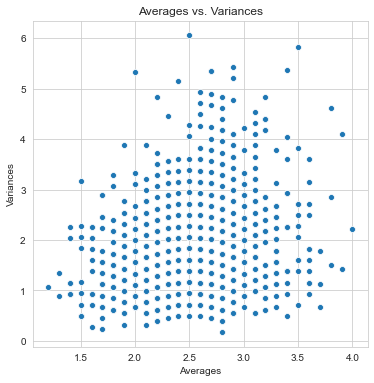

In [ ]:
averages = []
variances = []

for i in range(0, 1500):
    # 10 trials of 10 coin flips with 25% probability of heads
    sample = st.binom.rvs(n=10, p=0.25, size=10)
    # Mean and variance of the values in the sample variable
    averages.append(st.describe(sample).mean)
    variances.append(st.describe(sample).variance)
    

# Plot the averages and variances   
plt.figure(figsize=(6,6))
sns.scatterplot(x=averages, y=variances)
plt.ylabel("Variances")
plt.xlabel("Averages")
plt.title("Averages vs. Variances")
plt.show()

# Chapter 2
## Calculating the Probability of Two Events

Any overlap?
When you calculate probabilities for multiple events the most important thing to notice is the relation between the events, in particular, if there is any overlap between any two events.

What would be the formula to calculate the probability of A or B, given that A and B are not mutually exclusive?

Answer = $$P(A and B) = P(A) + P(B)$$

### Measuring a sample

Let's work with a sample of coin flips to calculate some probabilities. You will calculate absolute and relative frequency and check the theoretical value from the distribution of the sample data.

The array sample_of_two_coin_flips has 1,000 experiments, each consisting of two fair coin flips. For each experiment, we record the number of heads out of the two coin flips: 0, 1, or 2.

In [ ]:
sample_of_two_coin_flips = np.array([1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0,
       1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0,
       0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1,
       2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0,
       2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1,
       0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2,
       1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 1, 1, 0, 2, 0, 2, 1])

In [ ]:
# Count how many times you got 2 heads from the sample data
count_2_heads = st.find_repeats(sample_of_two_coin_flips).counts[2]

# Divide the number of heads by the total number of draws
prob_2_heads = count_2_heads / 1000

# Display the result
print(prob_2_heads)

0.243


In [ ]:
# Get the relative frequency from sample_of_two_coin_flips
# Set numbins as 3
# Extract frequency
rel_freq = st.relfreq(sample_of_two_coin_flips, numbins=3).frequency
print(rel_freq)

[0.269 0.488 0.243]


In [ ]:
# Probability of getting 0, 1, or 2 from the distribution
probabilities = st.binom.pmf([0,1,2], n=2, p=0.5)
print(probabilities)

[0.25 0.5  0.25]


### Joint probabilities

In this exercise we're going to calculate joint probabilities using the following table:

Joint probability table

<table>
    <tr><th></th>
        <th>Engine</th>
        <th>Gear Box</th>
    </tr>
    <tr><th>Fails</th>
        <td>0.01</td>
        <td>0.005</td>
    </tr>
    <tr><th>Works</th>
        <td>0.99</td>
        <td>0.995</td>
    </tr>
</table>

Take the values from the table, create variables, and calculate the probability of the event in each step.

In [ ]:
# Calculate the probability that the engine and gear box both work.

# Individual probabilities
P_Eng_works = 0.99
P_GearB_works = 0.995

# Joint probability calculation
P_both_works = P_Eng_works * P_GearB_works

print(P_both_works)

0.98505


In [ ]:
# Calculate the probability that one fails -- either engine or gear box -- but not both.

# Individual probabilities
P_Eng_fails = 0.01
P_Eng_works = 0.99
P_GearB_fails = 0.005
P_GearB_works = 0.995

# Joint probability calculation
P_only_GearB_fails = P_GearB_fails * P_Eng_works
P_only_Eng_fails = P_Eng_fails * P_GearB_works

# Calculate result
P_one_fails = P_only_GearB_fails + P_only_Eng_fails

print(P_one_fails)

0.0149


In [ ]:
# What is the probability that either both work or both fail?

# Individual probabilities
P_Eng_fails = 0.01
P_Eng_works = 0.99
P_GearB_fails = 0.005
P_GearB_works = 0.995

# Joint probability calculation
P_EngW_GearBW = P_Eng_works * P_GearB_works
P_EngF_GearBF = P_Eng_fails * P_GearB_fails

# Calculate result
P_fails_or_works = P_EngW_GearBW + P_EngF_GearBF

print(P_fails_or_works)

0.9851


### Deck of cards

In this exercise, you'll use the following deck of cards to calculate some probabilities in each step:

In [ ]:
# Calculate the probability of not getting an Ace.

# Ace probability
P_Ace = 4/52

# Not Ace probability
P_not_Ace = 1 - P_Ace

print(P_not_Ace)

0.9230769230769231


In [ ]:
# Calculate the probability of getting a red card.

# Figure probabilities
P_Hearts = 13/52
P_Diamonds = 13/52

# Probability of red calculation
P_Red = P_Hearts + P_Diamonds

print(P_Red)

0.5


In [ ]:
# Calculate the probability of getting a Jack or a spade.

# Figure probabilities
P_Jack = 4/52
P_Spade = 13/52

# Joint probability
P_Jack_n_Spade = 1/52

# Probability of Jack or spade
P_Jack_or_Spade = P_Jack + P_Spade - P_Jack_n_Spade

print(P_Jack_or_Spade)

0.3076923076923077


In [ ]:
# Calculate the probability of getting a King or a Queen.

P_King = 4/52
P_Queen = 4/52

# Joint probability
P_King_n_Queen = 0

# Probability of King or Queen
P_King_or_Queen = P_King + P_Queen - P_King_n_Queen

print(P_King_or_Queen)

0.15384615384615385


## Conditional Probabilities

### Delayed flights

A certain airline offers flights departing to New York on Tuesdays and Fridays, but sometimes the flights are delayed:

<table>
    <tr>
        <th></th>
        <th>Delayed</th>
        <th>On Time</th>
        <th>Total</th>
    </tr>
    <tr>
        <th>Tuesday</th>
        <td>24</td>
        <td>114</td>
        <td>138</td>
    </tr>
    <tr>
        <th>Friday</th>
        <td>11</td>
        <td>127</td>
        <td>138</td>
    </tr>
    <tr>
        <th>Total</th>
        <td>35</td>
        <td>241</td>
        <td>276</td>
    </tr>
</table>
At the bottom of the Delayed column you have a total of 35, which means there were 35 delayed flights out of the total of 276 departures in the sample. Of these, 24 were on Tuesday and 11 on Friday.

In [ ]:
# What is the probability of a flight being on time?

# Needed quantities
On_time = 241
Total_departures = 276

# Probability calculation
P_On_time = On_time / Total_departures

print(P_On_time)

0.8731884057971014


In [ ]:
# Every departure is on time with probability P_On_time. What is the probability of a flight being delayed?

# Needed quantities
P_On_time = 241 / 276

# Probability calculation
P_Delayed = 1 - P_On_time

print(P_Delayed)

0.12681159420289856


In [ ]:
# Given that it's Tuesday, what is the probability of a flight being delayed (P(Delayed|Tuesday))?

# Needed quantities
Delayed_on_Tuesday = 24
On_Tuesday = 138

# Probability calculation
P_Delayed_g_Tuesday = Delayed_on_Tuesday / On_Tuesday

print(P_Delayed_g_Tuesday)

0.17391304347826086


In [ ]:
# Given that it's Friday, what is the probability of a flight being delayed (P(Delayed|Friday))?

# Needed quantities
Delayed_on_Friday = 11
On_Friday = 138

# Probability calculation
P_Delayed_g_Friday = Delayed_on_Friday / On_Friday

print(P_Delayed_g_Friday)

0.07971014492753623


Contingency table

The following table shows the numbers of red and black cards in a deck that are Aces and non-Aces:


<table>
    <tr>
        <th></th>
        <th>Red</th>
        <th>Black</th>
        <th>Total</th>
    </tr>
    <tr>
        <th>Ace</th>
        <td>2</td>
        <td>2</td>
        <td>4</td>
    </tr>
    <tr>
        <th>Non Ace</th>
        <td>24</td>
        <td>24</td>
        <td>48</td>
    </tr>
    <tr>
        <th>Total</th>
        <td>26</td>
        <td>26</td>
        <td>52</td>
    </tr>
</table>

The total in the Red column is 26, which means there are 26 red cards in the deck. Of these, 2 are Aces and 24 are non-Aces. There are 52 cards in a deck. Use the values in the table to calculate some conditional probabilities.


In [ ]:
# Calculate P(Ace|Red).

# Individual probabilities
P_Red = 26/52
P_Red_n_Ace = 2/52

# Conditional probability calculation
P_Ace_given_Red = P_Red_n_Ace / P_Red

print(P_Ace_given_Red)

0.07692307692307693


In [ ]:
# Calculate P(Black|Ace).

# Individual probabilities
P_Ace = 4/52
P_Ace_n_Black = 2/52

# Conditional probability calculation
P_Black_given_Ace = P_Ace_n_Black / P_Ace

print(P_Black_given_Ace)

0.5


In [ ]:
# Calculate P(Non Ace|Black).

# Individual probabilities
P_Black = 26/52
P_Black_n_Non_ace = 24/52

# Conditional probability calculation
P_Non_ace_given_Black = P_Black_n_Non_ace / P_Black

print(P_Non_ace_given_Black)

0.9230769230769231


In [ ]:
# Calculate P(Red|Non Ace).

# Individual probabilities
P_Non_ace = 48/52
P_Non_ace_n_Red = 24/52

# Conditional probability calculation
P_Red_given_Non_ace = P_Non_ace_n_Red / P_Non_ace

print(P_Red_given_Non_ace)

0.5


### More cards

Now let's use the deck of cards to calculate some conditional probabilities.

In [ ]:
# Calculate the probability of getting two Jacks (P(Jack and Jack)).

# Needed probabilities
P_first_Jack = 4/52
P_Jack_given_Jack = 3/51

# Joint probability calculation
P_two_Jacks = P_first_Jack * P_Jack_given_Jack

print(P_two_Jacks)

0.004524886877828055


In [ ]:
# Calculate P(Ace|Spade)

# Needed probabilities
P_Spade = 13/52
P_Spade_n_Ace = 1/52

# Conditional probability calculation
P_Ace_given_Spade = P_Spade_n_Ace / P_Spade

print(P_Ace_given_Spade)

0.07692307692307693


In [ ]:
# Calculate P(Queen|Face card)

# Needed probabilities
P_Face_card = 12/52
P_Face_card_n_Queen = 4/52

# Conditional probability calculation
P_Queen_given_Face_card = P_Face_card_n_Queen / P_Face_card

print(P_Queen_given_Face_card)

0.3333333333333333


## Total Probability Law

### Formula 1 engines

Suppose that two manufacturers, A and B, supply the engines for Formula 1 racing cars, with the following characteristics:

- 99% of the engines from factory A last more than 5,000 km.
- Factory B manufactures engines that last more than 5,000 km with 95% probability.
- 70% of the engines are from manufacturer A, and the rest are produced by manufacturer B.

What is the chance that an engine will last more than 5,000 km?

Calculate the following probabilities:

- The manufacturer is A (P_A).
- The engine lasts more than 5,000 km given that manufacturer is A (P_last5000_g_A).
- The manufacturer is B (P_B).
- The engine lasts more than 5,000 km given that manufacturer is B (P_last5000_g_B).

Use the total probability law to calculate the probability that the engine will last more than 5,000 km and store the result into P_last_5000.

__Hint__

Recall that the joint probability is the marginal probability times the conditional probability.

In [ ]:
# Needed probabilities
P_A = 0.7
P_last5000_g_A = 0.99
P_B = 0.3
P_last5000_g_B = 0.95

# Total probability calculation
P_last_5000 = P_A * P_last5000_g_A + P_B * P_last5000_g_B

print(P_last_5000)

0.978


### Voters

Of the total population of three states X, Y, and Z, 43% are from state X, 25% are from state Y, and 32% are from state Z. A poll is taken and the result is the following:

- 53% of the voters support John Doe in state X.
- 67% of the voters support John Doe in state Y.
- 32% of the voters support John Doe in state Z.

Given that a voter supports John Doe, answer the following questions.

__Hint__:
Specify the individual probabilities and the conditional probabilities, and then use the total probability formula.

In [ ]:
# What is the probability that the voter lives in state X and supports John Doe?

# Individual probabilities
P_X = 0.43

# Conditional probabilities
P_Support_g_X = 0.53

# Total probability calculation
P_X_n_Support = P_X * P_Support_g_X
print(P_X_n_Support)

0.22790000000000002


In [ ]:
# What is the probability that the voter lives in state Z and does not support John Doe?

# Individual probabilities
P_Z = 0.32

# Conditional probabilities
P_Support_g_Z = 0.32
P_NoSupport_g_Z = 1 - P_Support_g_Z

# Total probability calculation
P_Z_n_NoSupport = P_Z * P_NoSupport_g_Z
print(P_Z_n_NoSupport)

0.2176


In [ ]:
# What is the total percentage of voters that support John Doe?

# Individual probabilities
P_X = 0.43
P_Y = 0.25
P_Z = 0.32

# Conditional probabilities
P_Support_g_X = 0.53
P_Support_g_Y = 0.67
P_Support_g_Z = 0.32

# Total probability calculation
P_Support = P_X * P_Support_g_X + P_Y * P_Support_g_Y + P_Z * P_Support_g_Z
print(P_Support)

0.4978


## Bayes' Rule

### Conditioning
In many situations we find events that depend on other events, and we are interested in calculating probabilities taking into consideration such relations.

On the other hand, many problems can be studied by classifying the elements in our sample space. It is easier to work with classifications that do not have elements in common -- i.e., that do not overlap. Using this context, please answer the following question:

Why is Bayes' rule important?

Reducing your sample space is to condition, then you calculate probabilities.

### Factories and parts

A certain electronic part is manufactured by three different vendors named V1, V2, and V3.

Half of the parts are produced by V1, 25% by V2, and the rest by V3. The probability of a part being damaged given that it was produced by V1 is 1%, while it's 2% for V2 and 3% for V3.

If a part taken at random is damaged, answer the following questions.

In [ ]:
# What is the probability that the part was manufactured by V1?

# Individual probabilities & conditional probabilities
P_V1 = 0.5
P_V2 = 0.25
P_V3 = 0.25
P_D_g_V1 = 0.01
P_D_g_V2 = 0.02
P_D_g_V3 = 0.03

# Probability of Damaged
P_Damaged = (P_V1 * P_D_g_V1) + (P_V2 * P_D_g_V2) + (P_V3 * P_D_g_V3)

# Bayes' rule for P(V1|D)
P_V1_g_D = (P_V1 * P_D_g_V1) / P_Damaged

print(P_V1_g_D)

0.2857142857142857


In [ ]:
# What is the probability that it was manufactured by V2?

# Individual probabilities & conditional probabilities
P_V1 = 0.5
P_V2 = 0.25
P_V3 = 0.25
P_D_g_V1 = 0.01
P_D_g_V2 = 0.02
P_D_g_V3 = 0.03

# Probability of Damaged
P_Damaged = (P_V1 * P_D_g_V1) + (P_V2 * P_D_g_V2) + (P_V3 * P_D_g_V3)

# Bayes' rule for P(V2|D)
P_V2_g_D = (P_V2 * P_D_g_V2) / P_Damaged

print(P_V2_g_D)

0.2857142857142857


In [ ]:
# What is the probability that the part was manufactured by V3?

# Individual probabilities & conditional probabilities
P_V1 = 0.5
P_V2 = 0.25
P_V3 = 0.25
P_D_g_V1 = 0.01
P_D_g_V2 = 0.02
P_D_g_V3 = 0.03

# Probability of Damaged
P_Damaged = (P_V1 * P_D_g_V1) + (P_V2 * P_D_g_V2) + (P_V3 * P_D_g_V3)

# Bayes' rule for P(V3|D)
P_V3_g_D = (P_V3 * P_D_g_V3) / P_Damaged

print(P_V3_g_D)

0.4285714285714285


### Swine flu blood test

You go to the doctor about a strong headache. The doctor randomly selects you for a blood test for swine flu, which is suspected to affect 1 in 9,000 people in your city. The accuracy of the test is 99%, meaning that the probability of a false positive is 1%. The probability of a false negative is zero.

Given that you test positive, answer the following questions.

In [ ]:
# What is the probability that you have swine flu given that your test outcome is positive?

# Probability of having Swine_flu
P_Swine_flu = 1./9000

# Probability of not having Swine_flu
P_no_Swine_flu = 1 - P_Swine_flu

# Probability of being positive given that you have Swine_flu
P_Positive_g_Swine_flu = 1

# Probability of being positive given that you do not have Swine_flu
P_Positive_g_no_Swine_flu = 0.01

# Probability of Positive
P_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) + (P_no_Swine_flu * P_Positive_g_no_Swine_flu)

# Bayes' rule for P(Swine_flu|Positive)
P_Swine_flu_g_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) / P_Positive

print(P_Swine_flu_g_Positive)

0.010990218705352238


In [ ]:
# You went to Miami and 1 in 350 people came back with swine flu. Calculate the new probability that you'll test positive.

# Individual probabilities & conditional probabilities
P_Swine_flu = 1./350
P_no_Swine_flu = 1 - P_Swine_flu
P_Positive_g_Swine_flu = 1
P_Positive_g_no_Swine_flu = 0.01

# Probability of Positive
P_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) + (P_no_Swine_flu * P_Positive_g_no_Swine_flu)

# Bayes' rule for P(Swine_flu|Positive)
P_Swine_flu_g_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) / P_Positive

print(P_Swine_flu_g_Positive)

0.22271714922048996


In [ ]:
# If the probability of a false positive is 2%, what is the new probability that you have swine flu after your vacation?

# Individual probabilities & conditional probabilities
P_Swine_flu = 1./350
P_no_Swine_flu = 1 - P_Swine_flu
P_Positive_g_Swine_flu = 1
P_Positive_g_no_Swine_flu = 0.02

# Probability of Positive
P_Positive = P_Swine_flu * P_Positive_g_Swine_flu + P_no_Swine_flu * P_Positive_g_no_Swine_flu

# Bayes' rule for P(Swine_flu|Positive)
P_Swine_flu_g_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) / P_Positive

print(P_Swine_flu_g_Positive)

0.12531328320802004


# Chapter 3
## Important Probability Distributions

### Range of values

Suppose the scores on a given academic test are normally distributed, with a mean of 65 and standard deviation of 10.

What would be the range of scores two standard deviations from the mean?


45 and 85

In [ ]:
mn = 65
std = 10

upper = mn + (2 * std)
lower = mn - (2 * std)

print(lower, upper)

45 85


## Plotting normal distributions

A certain restaurant chain has been collecting data about customer spending. The data shows that the spending is approximately normally distributed, with a mean of 3.15 and a standard deviation of 1.50 per customer.

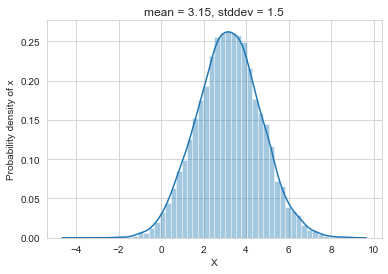

In [ ]:
# Create the sample using norm.rvs()
sample = st.norm.rvs(loc=3.15, scale=1.5, size=10000, random_state=13)

# Plot the sample
sns.distplot(sample)
plt.ylabel("Probability density of x")
plt.xlabel("X")
plt.title("mean = 3.15, stddev = 1.5")
plt.show()

### Within three standard deviations
The heights of every employee in a company have been measured, and they are distributed normally with a mean of 168 cm and a standard deviation of 12 cm.

What is the probability of getting a height within three standard deviations of the mean?

99.7%

### Restaurant spending example

Let's go back to the example of the restaurant chain that has been collecting data about customer spending. Recall that the data shows that the spending is approximately normally distributed, with a mean of 3.15 and a standard deviation of 1.5 per customer, as pictured in the plot.

In [ ]:
# What is the probability that a customer will spend $3 or less?

# Probability of spending $3 or less
spending = st.norm.cdf(3, loc=3.15, scale=1.5)
print(spending)

0.46017216272297107


In [ ]:
# What is the probability that a customer will spend more than $5?

# Probability of spending more than $5
spending = st.norm.sf(5, loc=3.15, scale=1.5)
print(spending)

0.10872571321259111


In [ ]:
# What is the probability that a customer will spend more than $2.15 and $4.15 or less?

# Probability of spending more than $2.15 and $4.15 or less
spending_4 = st.norm.cdf(4.15, loc=3.15, scale=1.5)
spending_2 = st.norm.cdf(2.15, loc=3.15, scale=1.5)
print(spending_4 - spending_2)

0.4950149249061543


In [ ]:
# What is the probability that a customer will spend $2.15 or less or more than $4.15?

# Probability of spending $2.15 or less or more than $4.15
spending_2 = st.norm.cdf(2.15, loc=3.15, scale=1.5)
spending_over_4 = st.norm.sf(4.15, loc=3.15, scale=1.5) 
print(spending_2 + spending_over_4)

0.5049850750938457


### Smartphone battery example

One of the most important things to consider when buying a smartphone is how long the battery will last.

Suppose the period of time between charges can be modeled with a normal distribution with a mean of 5 hours and a standard deviation of 1.5 hours.

A friend wants to buy a smartphone and is asking you the following questions.

In [ ]:
# What is the probability that the battery will last less than 3 hours?

# Probability that battery will last less than 3 hours
less_than_3h = st.norm.cdf(3, loc=5, scale=1.5)
print(less_than_3h)

0.09121121972586788


In [ ]:
# What is the probability that the battery will last more than 3 hours?

# Probability that battery will last more than 3 hours
more_than_3h = st.norm.sf(3, loc=5, scale=1.5)
print(more_than_3h)

0.9087887802741321


In [ ]:
# What is the probability that the battery will last between 5 and 7 hours?

# Probability that battery will last between 5 and 7 hours
P_less_than_7h = st.norm.cdf(7, loc=5, scale=1.5)
P_less_than_5h = st.norm.cdf(5, loc=5, scale=1.5)
print(P_less_than_7h - P_less_than_5h)

0.4087887802741321


### Adults' heights example

The heights of adults aged between 18 and 35 years are normally distributed. For males, the mean height is 70 inches with a standard deviation of 4. Adult females have a mean height of 65 inches with a standard deviation of 3.5. You can see how the heights are distributed in this plot:

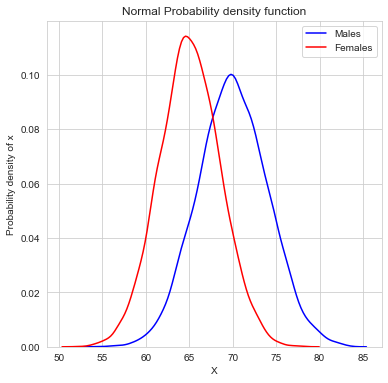

In [ ]:
females = st.norm.rvs(loc=65, scale=3.5, size=10000)
males = st.norm.rvs(loc=70, scale=4, size=10000)

fig, ax = plt.subplots(figsize=(6,6))

sns.distplot(males, ax=ax, hist=False, color='Blue', label='Males')
sns.distplot(females, ax=ax, hist=False, color='Red', label='Females')

plt.ylabel("Probability density of x")
plt.xlabel("X")
plt.title("Normal Probability density function")
plt.show()

In [ ]:
# Print the range of female heights one standard deviation from the mean.

# Values one standard deviation from mean height for females
interval = st.norm.interval(0.68, loc=65, scale=3.5)
print(interval)

(61.51939740876586, 68.48060259123413)


In [ ]:
# Print the value where the tallest males fall with 0.01 probability.

# Value where the tallest males fall with 0.01 probability
tallest = st.norm.ppf(.99, loc=70, scale=4)
print(tallest)

79.30539149616337


In [ ]:
# Print the probability of being taller than 73 inches for a male and for a female.

# Probability of being taller than 73 inches for males and females
P_taller_male = st.norm.sf(73, loc=70, scale=4)
P_taller_female = st.norm.sf(73, loc=65, scale=3.5)
print(P_taller_male, P_taller_female)

0.2266273523768682 0.011135489479616392


In [ ]:
# Print the probability of being shorter than 61 inches for a male and for a female.

# Probability of being shorter than 61 inches for males and females
P_shorter_male = st.norm.cdf(61, loc=70, scale=4)
P_shorter_female = st.norm.cdf(61, loc=65, scale=3.5)
print(P_shorter_male, P_shorter_female)

0.012224472655044696 0.12654895447355774


## Poisson Distributions

### ATM example

If you know how many specific events occurred per unit of measure, you can assume that the distribution of the random variable follows a Poisson distribution to study the phenomenon.

Consider an ATM (automatic teller machine) at a very busy shopping mall. The bank wants to avoid making customers wait in line to use the ATM. It has been observed that the average number of customers making withdrawals between 10:00 a.m. and 10:05 a.m. on any given day is 1.

As a data analyst at the bank, you are asked what the probability is that the bank will need to install another ATM to handle the load.

To answer the question, you need to calculate the probability of getting more than one customer during that time period.

In [ ]:
# Calculate the probability of having more than one customer visiting the ATM in this 5-minute period.

# Probability of more than 1 customer
probability = st.poisson.sf(k=1, mu=1)

# Print the result
print(probability)

0.2642411176571153


### Highway accidents example

On a certain turn on a very busy highway, there are 2 accidents per day. Let's assume the number of accidents per day can be modeled as a Poisson random variable and is distributed as in the following plot:

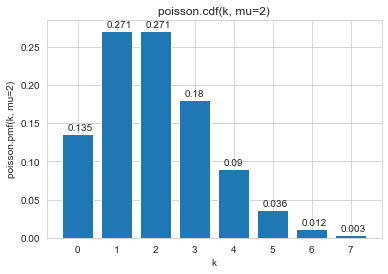

In [ ]:
k = np.arange(0,8)

p_dist = st.poisson.pmf(k, mu=2)

plt.bar(x=k, height=p_dist)

for i, k in zip(p_dist, k):
    plt.annotate(round(i, 3), xy=[k-.25,i+0.005], )

plt.ylabel("poisson.pmf(k, mu=2)")
plt.xlabel("k")

plt.title("poisson.cdf(k, mu=2)")
plt.show()

In [ ]:
# Determine and print the probability of there being 5 accidents on any day.

# Probability of 5 accidents any day
P_five_accidents = st.poisson.pmf(k=5, mu=2)

# Print the result
print(P_five_accidents)

0.03608940886309672


In [ ]:
# Determine and print the probability of having 4 or 5 accidents on any day.

# Probability of having 4 or 5 accidents on any day
P_less_than_6 = st.poisson.cdf(k=5, mu=2)
P_less_than_4 = st.poisson.cdf(k=3, mu=2)

# Print the result
print(P_less_than_6 - P_less_than_4)

0.12631293102083851


__Hint__

Use cdf(), but recall that the k value is included in the calculation. Less than 6 is 5 or less, and less than 4 is 3 or less. If you subtract cdf for 5 and cdf for 3 you will get the required range.

In [ ]:
# Determine and print the probability of having more than 3 accidents on any day.

# Probability of more than 3 accidents any day
P_more_than_3 = st.poisson.sf(k=3, mu=2)

# Print the result
print(P_more_than_3)

0.14287653950145296


In [ ]:
# Determine and print the number of accidents that is likely to happen with 0.75 probability.

# Number of accidents with 0.75 probability
accidents = st.poisson.ppf(q=0.75, mu=2)

# Print the result
print(accidents)

3.0


### Generating and plotting Poisson distributions

In the previous exercise, you calculated some probabilities. Now let's plot that distribution.

Recall that on a certain highway turn, there are 2 accidents per day on average. Assuming the number of accidents per day can be modeled as a Poisson random variable, let's plot the distribution.

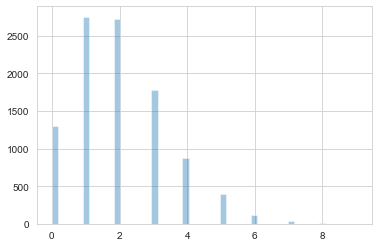

In [ ]:
# Create the sample
sample = st.poisson.rvs(mu=2, size=10000, random_state=13)

# Plot the sample
sns.distplot(sample, kde=False)
plt.show()

## Geometric Distributions

### Catching salmon example

Every fall the salmon run occurs -- this is the time when salmon swim back upriver from the ocean to spawn. While swimming back to the upper river (usually to the place where they were spawned), the fish may encounter grizzly bears. Some of these bears can eat 18 salmon in 3 hours, and they have a 0.0333 probability of success in their attempts to catch a fish.

We can model a grizzly bear catching salmon with a geometric distribution.

In [ ]:
# Calculate and print the probability that the bear will catch a salmon on its third attempt, after failing two times.

# Getting a salmon on the third attempt
probability = st.geom.pmf(k=3, p=0.0333)

# Print the result
print(probability)

0.031119146037000004


In [ ]:
# Calculate and print the probability that the bear will get a salmon in less than 5 attempts.

# Probability of getting a salmon in less than 5 attempts
probability = st.geom.cdf(k=4, p=0.0333)

# Print the result
print(probability)

0.12669313451096792


In [ ]:
# Calculate and print the probability that the bear will get a salmon in less than 21 attempts.

# Probability of getting a salmon in less than 21 attempts
probability = st.geom.cdf(k=20, p=0.0333)

# Print the result
print(probability)

0.49203431872528924


In [ ]:
# Calculate and print how many attempts the bear has to make to have a 0.9 probability of catching a salmon.

# Attempts for 0.9 probability of catching a salmon
attempts = st.geom.ppf(q=0.9, p=0.0333)

# Print the result
print(attempts)

68.0


### Free throws example

Suppose you know that a basketball player has a 0.3 probability of scoring a free throw. What is the probability of them missing with the first throw and scoring with the second?

In [ ]:
# Probability of missing first and scoring on second throw
probability = st.geom.pmf(k=2, p=0.3)

# Print the result
print(probability)

0.21


### Generating and plotting geometric distributions

In sports it is common for players to make multiple attempts to score points for themselves or their teams. Each single attempt can have two possible outcomes, scoring or not scoring. Those situations can be modeled with geometric distributions. With scipy.stats you can generate samples using the rvs() function for each distribution.

Consider the previous example of a basketball player who scores free throws with a probability of 0.3. Generate a sample, and plot it.

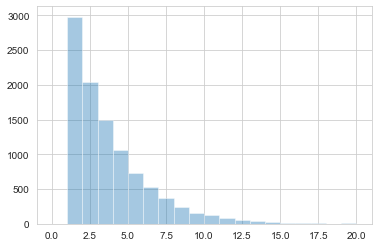

In [ ]:
# Create the sample
sample = st.geom.rvs(p=0.3, size=10000, random_state=13)

# Plot the sample
sns.distplot(sample, bins = np.linspace(0,20,21), kde=False)
plt.show()

# Chapter 4
## Probability Meets Statistics

### Generating a sample

A hospital's planning department is investigating different treatments for newborns. As a data scientist you are hired to simulate the sex of 250 newborn children, and you are told that on average 50.50% are males.

In [ ]:
# Generate a sample of 250 newborn children
sample = st.binom.rvs(n=1, p=0.505, size=250, random_state=42)

# Show the sample values
print(sample)

[1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0]


### Calculating the sample mean

Now you can calculate the sample mean for this generated sample by taking some elements from the sample.

Using the sample variable you just created, you'll calculate the sample means of the first 10, 50, and 250 samples.

In [ ]:
# Print the sample mean of the first 10 samples
print(st.describe(sample[0:10]).mean)

0.4


In [ ]:
# Print the sample mean of the first 50 samples
print(st.describe(sample[0:50]).mean)

0.56


In [ ]:
# Print the sample mean of the first 250 samples
print(st.describe(sample[0:250]).mean)

0.504


### Plotting the sample mean

Now let's plot the sample mean, so you can see more clearly how it evolves as more data becomes available.



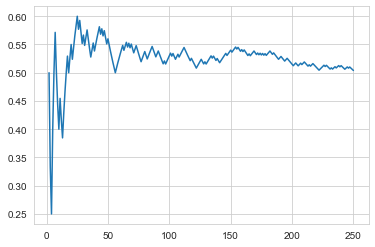

In [ ]:
# Calculate sample mean and store it on averages array
averages = []
for i in range(2, 251):
    averages.append(st.describe(sample[0:i]).mean)
    
plt.plot(range(2, 251), averages)
plt.show()

### Sample means

An important result in probability and statistics is that the shape of the distribution of the means of random variables tends to a normal distribution, which happens when you add random variables with any distribution with the same expected value and variance.

### Sample means follow a normal distribution

In the previous exercise, we generated a population that followed a binomial distribution, chose 20 random samples from the population, and calculated the sample mean. Now we're going to test some other probability distributions to see the shape of the sample means.

From the scipy.stats library, we've loaded the poisson and geom objects and the describe() function. We've also imported matplotlib.pyplot as plt and numpy as np.

As you'll see, the shape of the distribution of the means is the same even though the samples are generated from different distributions.

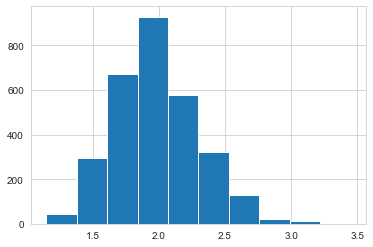

In [ ]:
# Generate the population
population = st.geom.rvs(p=0.5, size=1000)

# Create list for sample means
sample_means = []
for _ in range(3000):
	# Take 20 values from the population
    sample = np.random.choice(population, 20)
    # Calculate the sample mean
    sample_means.append(st.describe(sample).mean)

# Plot the histogram
plt.hist(sample_means)
plt.show()

### Adding dice rolls

To illustrate the central limit theorem, we are going to work with dice rolls. We'll generate the samples and then add them to plot the outcome.

You're provided with a function named roll_dice() that will generate the sample dice rolls. numpy is already imported as np for your convenience: you have to use np.add(sample1, sample2) to add samples. Also, matplotlib.pyplot is imported as plt so you can plot the histograms.

In [ ]:
def roll_dice(num_rolls):
    """Generate dice roll simulations
    Parameters
        num_rolls : int
        The number of dice rolls to simulate
    Returns
        list a list with num_rolls simulations of dice rolls"""
    
    sample = []
    
    for i in range(num_rolls):
        sample.append(np.random.randint(1,6))
    
    return(sample)

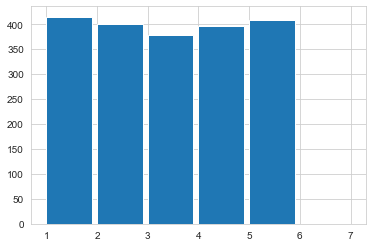

In [ ]:
# Generate a sample of 2000 dice rolls using roll_dice() and plot a histogram of the sample.

# Configure random generator
np.random.seed(42)

# Generate the sample
sample1 = roll_dice(2000)

# Plot the sample
plt.hist(sample1, bins=range(1, 8), width=0.9)
plt.show()

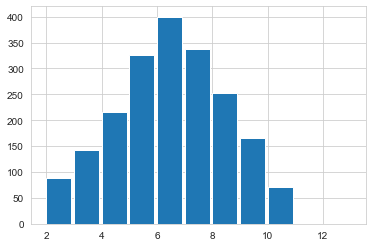

In [ ]:
# Add sample1 and sample2 using np.add(), store the result in the variable sum_of_1_and_2, then plot sum_of_1_and_2.

# Generate two samples of 2000 dice rolls
sample1 = roll_dice(2000)
sample2 = roll_dice(2000)

# Add the first two samples
sum_of_1_and_2 = np.add(sample1, sample2)

# Plot the sum
plt.hist(sum_of_1_and_2, bins=range(2, 14), width=0.9)
plt.show()

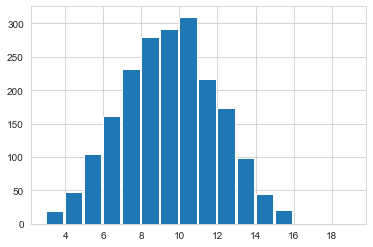

In [ ]:
# Add sum_of_1_and_2 and sample3 using np.add() and store the result in sum_of_3_samples. Then plot sum_of_3_samples.

# Generate the samples
sample1 = roll_dice(2000)
sample2 = roll_dice(2000)
sample3 = roll_dice(2000)

# Add the first two samples
sum_of_1_and_2 = np.add(sample1, sample2)

# Add the first two with the third sample
sum_of_3_samples = np.add(sum_of_1_and_2, sample3)

# Plot the result
plt.hist(sum_of_3_samples, bins=range(3, 20), width=0.9)
plt.show() 

## Linear Regression

### Fitting a model

A university has provided you with data that shows a relationship between the hours of study and the scores that the students get on a given test.

You have access to the data through the variables hours_of_study and scores. Use a linear model to learn from the data.

In [ ]:
hours_of_study = [4, 8, 8, 12, 8, 9, 6, 11, 13, 13, 19, 16, 17, 17, 21, 21, 23, 27, 30, 24]
scores = [52, 54, 61, 63, 63, 60, 61, 70, 75, 77, 76, 79, 81, 83, 85, 86, 88, 90, 95, 93]

# Get the model parameters
slope, intercept, r_value, p_value, std_err = st.linregress(hours_of_study, scores)

# Print the linear model parameters
print('slope:', slope)
print('intercept:', intercept)

slope: 1.715259850957089
intercept: 48.27076128780868


### Predicting test scores

With the relationship between the hours of study and the scores that students got on a given test, you already got the parameters of a linear model, slope and intercept. With those parameters, let's predict the test score for a student who studies for 10 hours.

In [ ]:
# Predict the test score for 10 hours of study using the provided parameters in slope and intercept, then print the score.

# Get the predicted test score for given hours of study
score = slope*10 + intercept
print('score:', score)

score: 65.42335979737958


In [ ]:
# Now predict the score for 9 hours of study using the parameters in slope and intercept, then print the score.

# Get the predicted test score for given hours of study
score = slope*9 + intercept
print('score:', score)

score: 63.708099946422486


In [ ]:
# Lastly, predict the score for 12 hours of study using the same parameters, and print the score.

# Get the predicted test score for given hours of study
score = slope*12 + intercept
print('score:', score)

score: 68.85387949929375


### Studying residuals

To implement a linear model you must study the residuals, which are the distances between the predicted outcomes and the data.

Three conditions must be met:

1. The mean should be 0.
2. The variance must be constant.
3. The distribution must be normal.

We will work with data of test scores for two schools, A and B, on the same subject. model_A and model_B were fitted with hours_of_study_A and test_scores_A and hours_of_study_B and test_scores_B, respectively.

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

hours_of_study_A = np.array([[ 4],[ 9],[ 7], [12],[ 3],[ 9], [6], [11],[13],[13],[19],[16],[17],[17],[13],[21],
                             [23],[27],[30],[24]])

hours_of_study_B = np.array([[ 4],[ 9],[ 7],[12],[ 3],[ 9],[ 6],[11],[13],[13],[19],[16],[17],[17],[13],[21],[23],[27],
                             [30], [24],[17],[17],[19],[19], [19],[19]])

test_scores_A = np.array([52, 56, 59, 60, 61, 62, 63, 73, 75, 77, 76, 79, 81, 83, 85, 87, 89,89, 89, 93])

test_scores_B = np.array([58, 70, 60, 65, 57, 63, 63, 73, 65, 77, 58, 62, 62, 90, 85, 95, 97,
                          95, 65, 65, 70, 75, 65, 75, 85, 93])

# Fit the model
model_A = LinearRegression()
model_A.fit(hours_of_study_A, test_scores_A)

model_B = LinearRegression()
model_B.fit(hours_of_study_B, test_scores_B)

LinearRegression()

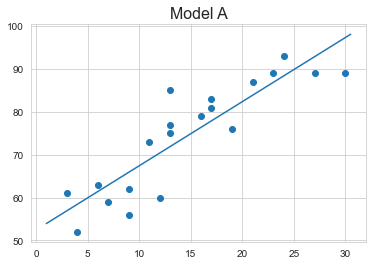

In [ ]:
# Make a scatter of hours_of_study_A and test_scores_A and plot hours_of_study_values_A and the outcomes from model_A.

# Test data
hours_of_study_values_A = np.array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5]).reshape(-1,1)

hours_of_study_values_B = np.array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. , 22.5,
       23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5, 28. ,
       28.5, 29. , 29.5, 30. , 30.5]).reshape(-1,1)

# Scatterplot of hours of study and test scores
plt.scatter(hours_of_study_A, test_scores_A)

# Plot of hours_of_study_values_A and predicted values
plt.plot(hours_of_study_values_A, model_A.predict(hours_of_study_values_A))
plt.title("Model A", fontsize=16)
plt.show()

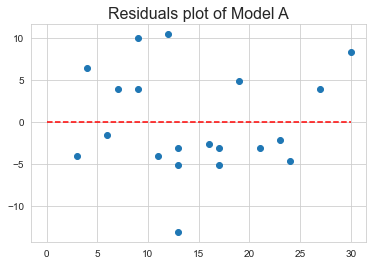

In [ ]:
# Subtract the predicted values and test_scores_A, then make a scatterplot with hours_of_study_A and residuals_A.

# Calculate the residuals
residuals_A = model_A.predict(hours_of_study_A) - test_scores_A

# Make a scatterplot of residuals of model_A
plt.scatter(hours_of_study_A, residuals_A)

# Add reference line and title and show plot
plt.hlines(0, 0, 30, colors='r', linestyles='--')
plt.title("Residuals plot of Model A", fontsize=16)
plt.show()

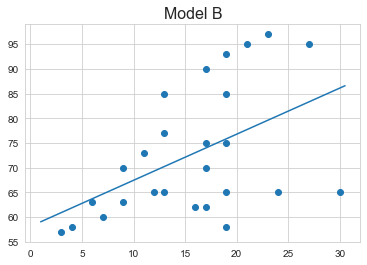

In [ ]:
# Make a scatter of hours_of_study_B and test_scores_B and plot hours_of_study_values_B and the outcomes from model_B.

# Scatterplot of hours of study and test scores
plt.scatter(hours_of_study_B, test_scores_B)

# Plot of hours_of_study_values_B and predicted values
plt.plot(hours_of_study_values_B, model_B.predict(hours_of_study_values_B))
plt.title("Model B", fontsize=16)
plt.show()

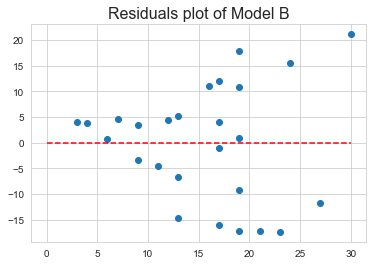

In [ ]:
# Subtract the predicted values and test_scores_B, then make a scatterplot with hours_of_study_B and residuals_B.

# Calculate the residuals
residuals_B = model_B.predict(hours_of_study_B) - test_scores_B

# Make a scatterplot of residuals of model_B
plt.scatter(hours_of_study_B, residuals_B)

# Add reference line and title and show plot
plt.hlines(0, 0, 30, colors='r', linestyles='--')
plt.title("Residuals plot of Model B", fontsize=16)
plt.show()

## Logistic Regression

### Fitting a logistic model

The university studying the relationship between hours of study and outcomes on a given test has provided you with a data set containing the number of hours the students studied and whether they failed or passed the test, and asked you to fit a model to predict future performance.

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

hours_of_study = np.array(hours_of_study).reshape(-1, 1)

outcomes = np.array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]).reshape(-1,1)

# sklearn logistic model
model = LogisticRegression(C=1e9)
model.fit(hours_of_study, outcomes)

# Get parameters
beta1 = model.coef_[0][0]
beta0 = model.intercept_[0]

# Print parameters
print(beta1, beta0)

1.2509820718463502 -14.133330643419832


### Predicting if students will pass

In the previous exercise you calculated the parameters of the logistic regression model that fits the data of hours of study and test outcomes.

With those parameters you can predict the performance of students based on their hours of study. Use model.predict() to get the outcomes based on the logistic regression.

In [ ]:
# Specify values to predict
hours_of_study_test = [[10], [11], [12], [13], [14]]

# Pass values to predict
predicted_outcomes = model.predict(hours_of_study_test)
print(predicted_outcomes)

# Set value in array
value = np.asarray(11).reshape(-1,1)

# Probability of passing the test with 11 hours of study
print("Probability of passing test ", model.predict_proba(value)[:,1])

[False False  True  True  True]
Probability of passing test  [0.40793034]


### Passing two tests

Put yourself in the shoes of one of the university students. You have two tests coming up in different subjects, and you're running out of time to study. You want to know how much time you have to study each subject to maximize the probability of passing both tests. Fortunately, there's data that you can use.

In [ ]:
# Use model_A to predict if you'll pass the test with 6, 7, 8, 9, or 10 hours of study and model_B with 3, 4, 5, or 6.

model_A = LogisticRegression()
model_A.fit()

# Specify values to predict
hours_of_study_test_A = [[6], [7], [8], [9], [10]]

# Pass values to predict
predicted_outcomes_A = model_A.predict(hours_of_study_test_A)
print(predicted_outcomes_A)

# Specify values to predict
hours_of_study_test_B = [[3], [4], [5], [6]]

# Pass values to predict
predicted_outcomes_B = model_B.predict(hours_of_study_test_B)
print(predicted_outcomes_B)

[61.42867607 62.92537997 64.42208387 65.91878777 67.41549167]
[60.91115538 61.84462151 62.77808765 63.71155378]


In [ ]:
# Get the probability of passing for test A with 8.6 hours of study and test B with 4.7 hours of study.

# Set value in array
value_A = np.asarray(8.6).reshape(-1,1)
# Probability of passing test A with 8.6 hours of study
print("The probability of passing test A with 8.6 hours of study is ", model_A.predict_proba(value_A)[:,1])

# Set value in array
value_B = np.asarray(4.7).reshape(-1,1)
# Probability of passing test B with 4.7 hours of study
print("The probability of passing test B with 4.7 hours of study is ", model_B.predict_proba(value_B)[:,1])

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'